In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import jax
import frozen_lake
import plotting
import utils

# preset


shape: (4, 4)
step:


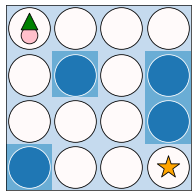

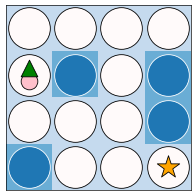

random rollout:
8.2 ms ± 22 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


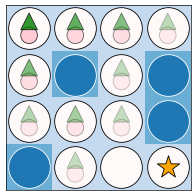


shape: (8, 8)
step:


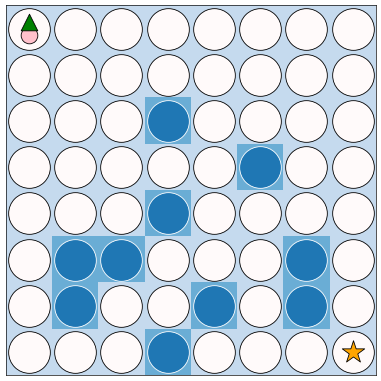

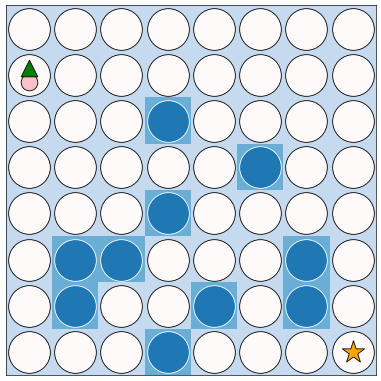

random rollout:
7.61 ms ± 35.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


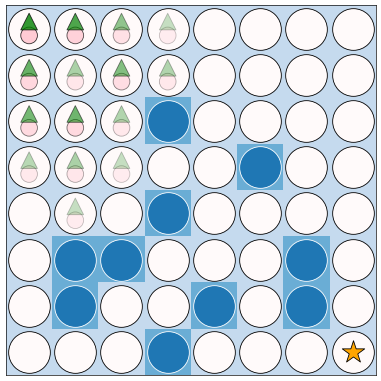

In [2]:
key = jax.random.PRNGKey(42)

for scale in [2, 3]:
    print(f"\nshape: {(2**scale, 2**scale)}")
    
    env = frozen_lake.FrozenLake.make_preset(key, scale)
    state, obs = env.reset(key)
    
    print("step:")
    plotting.render(env, state)
    state, obs, reward, done, info = env.step(state, key, action=1)
    plotting.render(env, state)

    print("random rollout:")
    transitions = utils.random_rollout(env, key, 128)
    %timeit utils.random_rollout(env, key, 128).reward.block_until_ready()
    plotting.render(env, transitions.env_state)

# random


shape: (4, 4)
make:
397 µs ± 5.16 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
step:


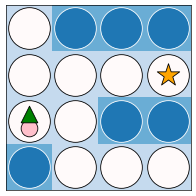

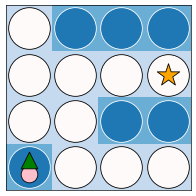

random rollout:
10.5 ms ± 59.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


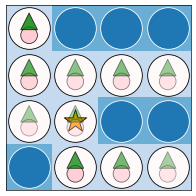


shape: (8, 8)
make:
731 µs ± 4.24 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
step:


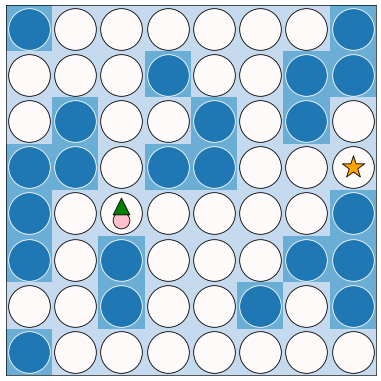

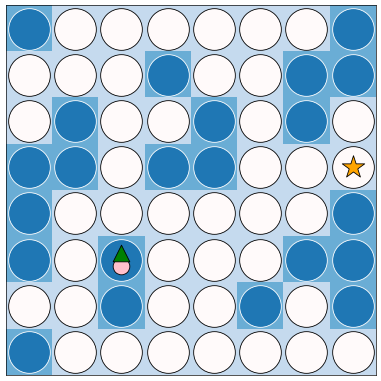

random rollout:
11.3 ms ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


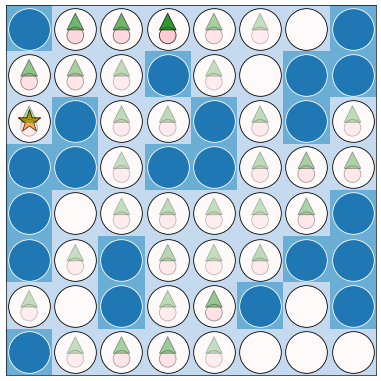


shape: (16, 16)
make:
1.44 ms ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
step:


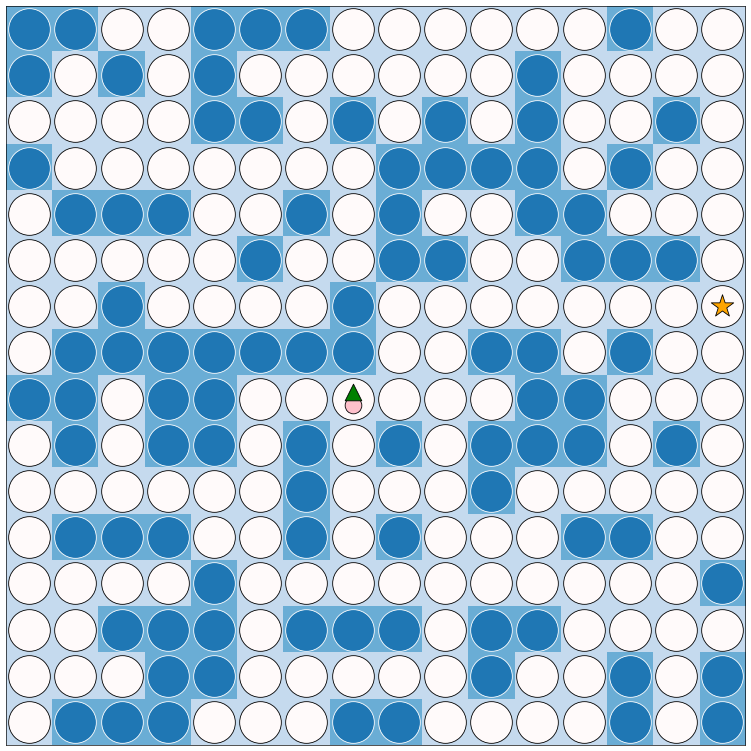

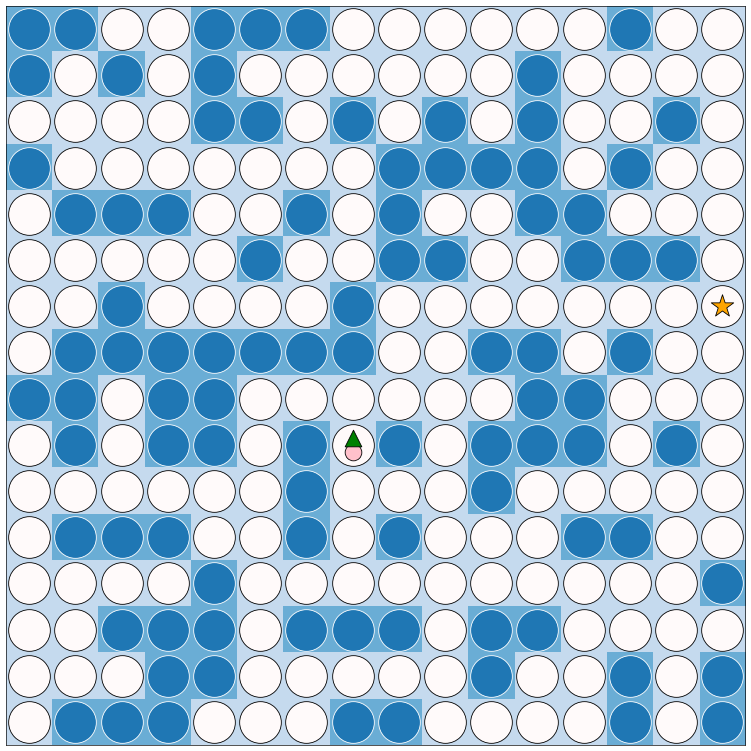

random rollout:
13 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


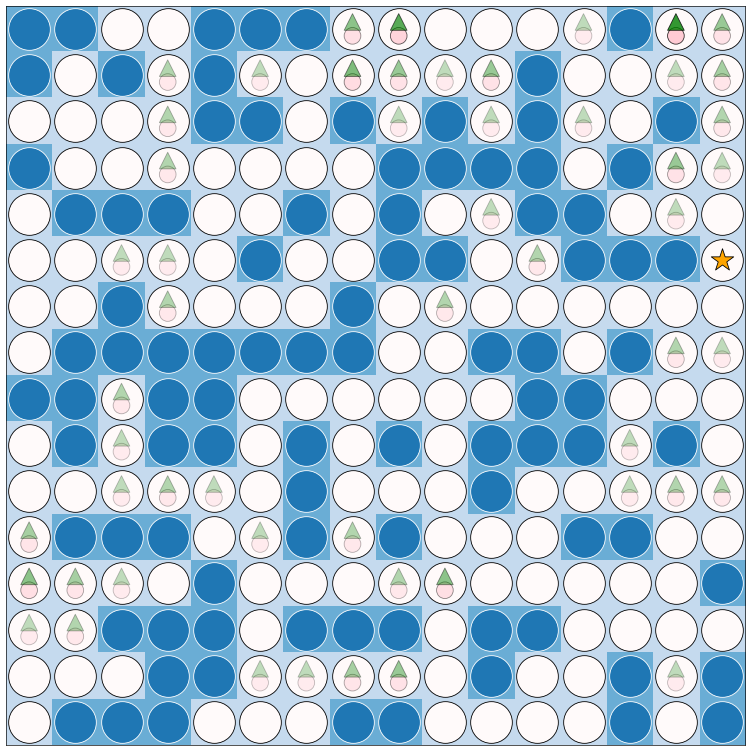

: 

In [3]:
key = jax.random.PRNGKey(42)
p = 0.5

for scale in [2, 3, 4]:
    print(f"\nshape: {(2**scale, 2**scale)}")
    
    print("make:")
    env = frozen_lake.FrozenLake.make_random(key, scale, p)
    state, obs = env.reset(key)
    %timeit frozen_lake.FrozenLake.make_random(key, scale, p).frozen.block_until_ready()
    
    print("step:")
    plotting.render(env, state)
    state, obs, reward, done, info = env.step(state, key, action=1)
    plotting.render(env, state)

    print("random rollout:")
    transitions = utils.random_rollout(env, key, 128)
    %timeit utils.random_rollout(env, key, 128).reward.block_until_ready()
    plotting.render(env, transitions.env_state)